In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import plot3d

In [3]:
def Gauss(x, y, z, std_y, std_z, mean_y, mean_z):
    data_x = []
    data_y = []
    data_z = []
    data = []
    answ = []
    for idx_z in z:
        for idx_y in y:
            for i, idx_x in enumerate(x):
                data_x.append(idx_x)
                data_y.append(idx_y)
                data_z.append(idx_z)
                c = 1/(2*np.pi*std_y[i]*std_z[i])*np.exp(-(idx_y-mean_y)**2/(2*std_y[i]**2) - (idx_z-mean_z)**2/(2*std_z[i]**2) - (idx_z + mean_z)**2/(2*std_z[i]**2))
                data.append(c)
                tmp = [idx_x, idx_y, idx_z, c]
                answ.append(tmp)
    res = []
    res.append(data_x)
    res.append(data_y)
    res.append(data_z)
    res.append(data)
    return res, answ

In [4]:
x = np.arange(7.8125, 2000, 15.625)
y = x.copy()
z = np.arange(7.8125, 1000, 15.625)
x_lenght = 2000
y_width = 2000
z_height = 1000

In [5]:
std_y = 1 * x
std_z = 5* x
mean_y = 1000
mean_z = 500

In [6]:
res, data_3d = Gauss(x, y, z, std_y, std_z, mean_y, mean_z)
data_3d = np.array(data_3d)

In [7]:
data_3d.shape

(1048576, 4)

In [27]:
print(len(data_3d[data_3d[:, 3] > 1e-8]))

800974


(array([6.26080e+05, 2.22906e+05, 7.40120e+04, 3.68840e+04, 2.19980e+04,
        1.46740e+04, 1.04960e+04, 7.72600e+03, 6.02000e+03, 4.81800e+03,
        3.83800e+03, 3.03200e+03, 2.36200e+03, 1.95200e+03, 1.64200e+03,
        1.35200e+03, 1.08600e+03, 9.76000e+02, 7.98000e+02, 6.92000e+02,
        6.16000e+02, 5.64000e+02, 4.26000e+02, 4.32000e+02, 3.52000e+02,
        3.12000e+02, 3.10000e+02, 2.46000e+02, 2.28000e+02, 1.94000e+02,
        2.12000e+02, 1.44000e+02, 1.48000e+02, 1.36000e+02, 1.46000e+02,
        8.60000e+01, 9.20000e+01, 8.60000e+01, 8.20000e+01, 7.40000e+01,
        4.40000e+01, 5.20000e+01, 6.00000e+01, 4.40000e+01, 3.40000e+01,
        3.40000e+01, 3.40000e+01, 2.20000e+01, 1.20000e+01, 1.00000e+01]),
 array([0.00000000e+00, 2.33341134e-08, 4.66682269e-08, 7.00023403e-08,
        9.33364537e-08, 1.16670567e-07, 1.40004681e-07, 1.63338794e-07,
        1.86672907e-07, 2.10007021e-07, 2.33341134e-07, 2.56675248e-07,
        2.80009361e-07, 3.03343475e-07, 3.26677588e-

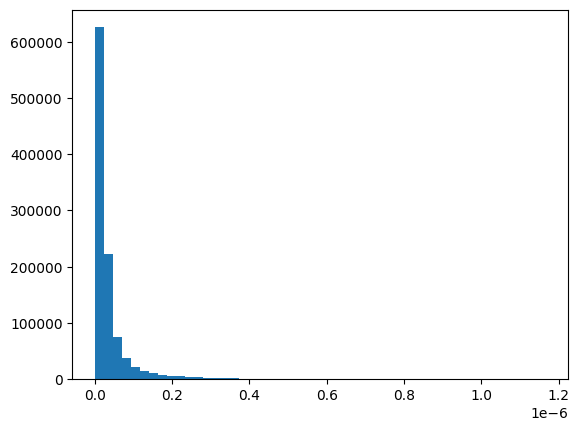

In [30]:
plt.hist(data_3d[:, 3], bins=50)

In [26]:
fig = plot3d.plot_3d_scalar(data_3d[data_3d[:, 3] > 1e-8], x_lenght, y_width, z_height)
fig.write_html("3d_mean_plot.html")
# fig.show()